# Basic exploratory data analysis on NFHS Data

# Reading file and Removing NAs

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from matplotlib.ticker import PercentFormatter
from numpy import median
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
#Load the excel file
child_data = pd.read_excel(r"C:\Users\dhanalaxmi\OneDrive - CSTEP\Desktop\NFHS\Child_data\Child_Health_Data.xlsx") 
dataframe=pd.DataFrame(child_data)

In [3]:
#No of observartions and variables:
shape=dataframe.shape

print("Number of Observation",shape[0])
print("Number of Variables",shape[1])

Number of Observation 7789
Number of Variables 181


In [4]:
#column names
dataframe.columns

Index(['Child's age in months', 'Child's weight in kilograms (1 decimal)',
       'Child's height in centimeters (1 decimal)', 'Height/Age percentile',
       'Height/Age standard deviation', 'Height/Age percent of ref. median',
       'Weight/Age percentile', 'Weight/Age standard deviation',
       'Weight/Age percent of ref. median', 'Weight/Height percentile',
       ...
       'Received Vitamin A2 (2nd most recent)',
       'NA - Received vitamin A after most recent in card',
       'NA - Ever received Vitamin A dose',
       'Taking iron pills, sprinkles or syrup',
       'Drugs for intestinal parasites in last 6 months',
       'Place first sought treatment for diarrhea', 'NA - Still has diarrhea',
       'NA - Times zinc was given', 'Place first sought treatment for fever',
       'Days after fever sought advice or treatment'],
      dtype='object', length=181)

In [5]:
#Count how many columns have Null values 
dataframe.isnull().sum()[dataframe.isnull().sum() > 7788].size

53

In [6]:
# count NAs in each column
dataframe.isnull().sum()

Child's age in months                           483
Child's weight in kilograms (1 decimal)         796
Child's height in centimeters (1 decimal)       802
Height/Age percentile                           931
Height/Age standard deviation                   931
                                               ... 
Place first sought treatment for diarrhea      7536
NA - Still has diarrhea                        7789
NA - Times zinc was given                      7789
Place first sought treatment for fever         7229
Days after fever sought advice or treatment    7229
Length: 181, dtype: int64

In [7]:
#drop columns with no values
df=dataframe.drop((dataframe.columns[dataframe.isnull().sum() > 7788]),axis=1)

In [8]:
# count how many columns have NO data 
df.isnull().sum()[df.isnull().sum() > 7788].size

0

In [9]:
# current shape of trimmed df
shape_df=np.shape(df)
print("Shape of trimmed dataframe",shape_df[1])

Shape of trimmed dataframe 128


In [10]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Dataframe variables dropped from 181 to 128


# Subgroups

**Health**

Height, Weight, Age, Hemoglobin level, Anemia level.

**Weaning**

Breastfeeding, Formula, Solid and liquid Items.

**Vaccine**

BCG, DPT 1, POLIO 1, DPT 2, POLIO 2, DPT 3, POLIO 3, MEASLES, POLIO 0.

**Medical Treatment**

Treatment for Fever,Cough and Diarrhea., Place of Treatment, Pills Syrup and injection took.



# Univariate Analysis

# Health

count    7306.000000
mean       29.344785
std        16.891280
min         0.000000
25%        15.000000
50%        29.000000
75%        44.000000
max        59.000000
Name: Child's age in months, dtype: float64

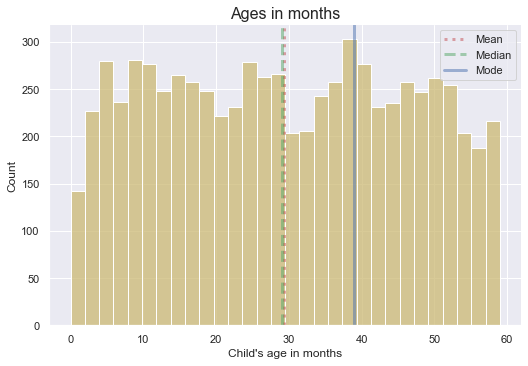

In [11]:
#Age Distribution plot
sns.displot(data=df,x="Child's age in months" , height=5,aspect=1.5, bins=30,color='y')
plt.title('Ages in months', fontsize=16)
plt.axvline(x=df["Child's age in months"].mean(),linewidth=3,linestyle=':' , color='r', label="Mean", alpha=0.5)
plt.axvline(x=df["Child's age in months"].median(),linewidth=3, linestyle='--', color='g', label="Median", alpha=0.5)
plt.axvline(x=df["Child's age in months"].mode().values[0], linewidth=3, color='b', label="Mode", alpha=0.5)

plt.legend(["Mean", "Median","Mode"])
df["Child's age in months"].describe()



count    6993.000000
mean      103.112827
std        33.044311
min        12.000000
25%        81.000000
50%       103.000000
75%       124.000000
max       755.000000
Name: Child's weight in kilograms (1 decimal), dtype: float64

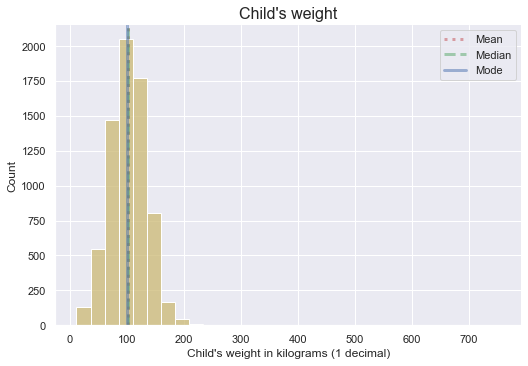

In [12]:
# Weight Distribution plot
sns.displot(data=df,x="Child's weight in kilograms (1 decimal)" , height=5,aspect=1.5, bins=30,color='y')
plt.title("Child's weight", fontsize=16)
plt.axvline(x=df["Child's weight in kilograms (1 decimal)"].mean(),linewidth=3,linestyle=':' , color='r', label="Mean", alpha=0.5)
plt.axvline(x=df["Child's weight in kilograms (1 decimal)"].median(),linewidth=3, linestyle='--', color='g', label="Median", alpha=0.5)
plt.axvline(x=df["Child's weight in kilograms (1 decimal)"].mode().values[0], linewidth=3, color='b', label="Mode", alpha=0.5)

plt.legend(["Mean", "Median","Mode"])
df["Child's weight in kilograms (1 decimal)"].describe()



count    6987.000000
mean      834.022757
std       144.482226
min       233.000000
25%       730.000000
50%       850.000000
75%       944.000000
max      1400.000000
Name: Child's height in centimeters (1 decimal), dtype: float64

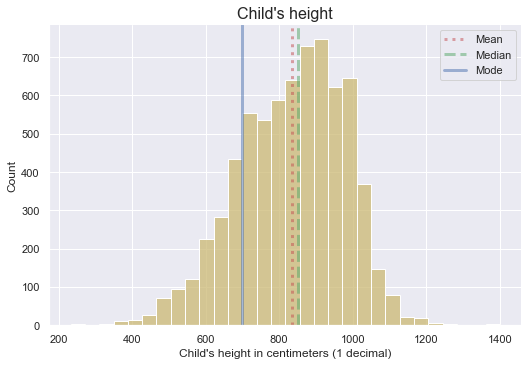

In [13]:
#Height Distribution plot
sns.displot(data=df,x="Child's height in centimeters (1 decimal)" , height=5,aspect=1.5, bins=30,color='y')
plt.title("Child's height", fontsize=16)
plt.axvline(x=df["Child's height in centimeters (1 decimal)"].mean(),linewidth=3,linestyle=':' , color='r', label="Mean", alpha=0.5)
plt.axvline(x=df["Child's height in centimeters (1 decimal)"].median(),linewidth=3, linestyle='--', color='g', label="Median", alpha=0.5)
plt.axvline(x=df["Child's height in centimeters (1 decimal)"].mode().values[0], linewidth=3, color='b', label="Mode", alpha=0.5)

plt.legend(["Mean", "Median","Mode"])
df["Child's height in centimeters (1 decimal)"].describe()


count    6153.000000
mean      105.140582
std        13.992169
min        20.000000
25%        97.000000
50%       105.000000
75%       114.000000
max       166.000000
Name: Hemoglobin level (g/dl - 1 decimal), dtype: float64

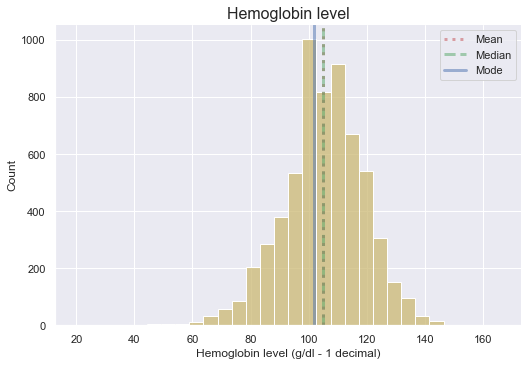

In [14]:
# Hemoglobin level plot
sns.displot(data=df,x="Hemoglobin level (g/dl - 1 decimal)" , height=5,aspect=1.5, bins=30,color='y')
plt.title("Hemoglobin level", fontsize=16)
plt.axvline(x=df["Hemoglobin level (g/dl - 1 decimal)"].mean(),linewidth=3,linestyle=':' , color='r', label="Mean", alpha=0.5)
plt.axvline(x=df["Hemoglobin level (g/dl - 1 decimal)"].median(),linewidth=3, linestyle='--', color='g', label="Median", alpha=0.5)
plt.axvline(x=df["Hemoglobin level (g/dl - 1 decimal)"].mode().values[0], linewidth=3, color='b', label="Mode", alpha=0.5)

plt.legend(["Mean", "Median","Mode"])
df["Hemoglobin level (g/dl - 1 decimal)"].describe()


count           6153
unique             4
top       Not anemic
freq            2335
Name: Anemia level, dtype: object

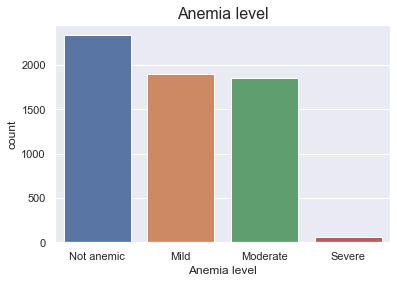

In [15]:
#Anemia level plot
df.loc[(df["Anemia level"] == '9'),"Anemia level"]=''

sns.countplot(data=df,x="Anemia level" )

plt.title("Anemia level", fontsize=16)

df["Anemia level"].describe()


# Multiple Univariate analysis

# Vaccine Chart

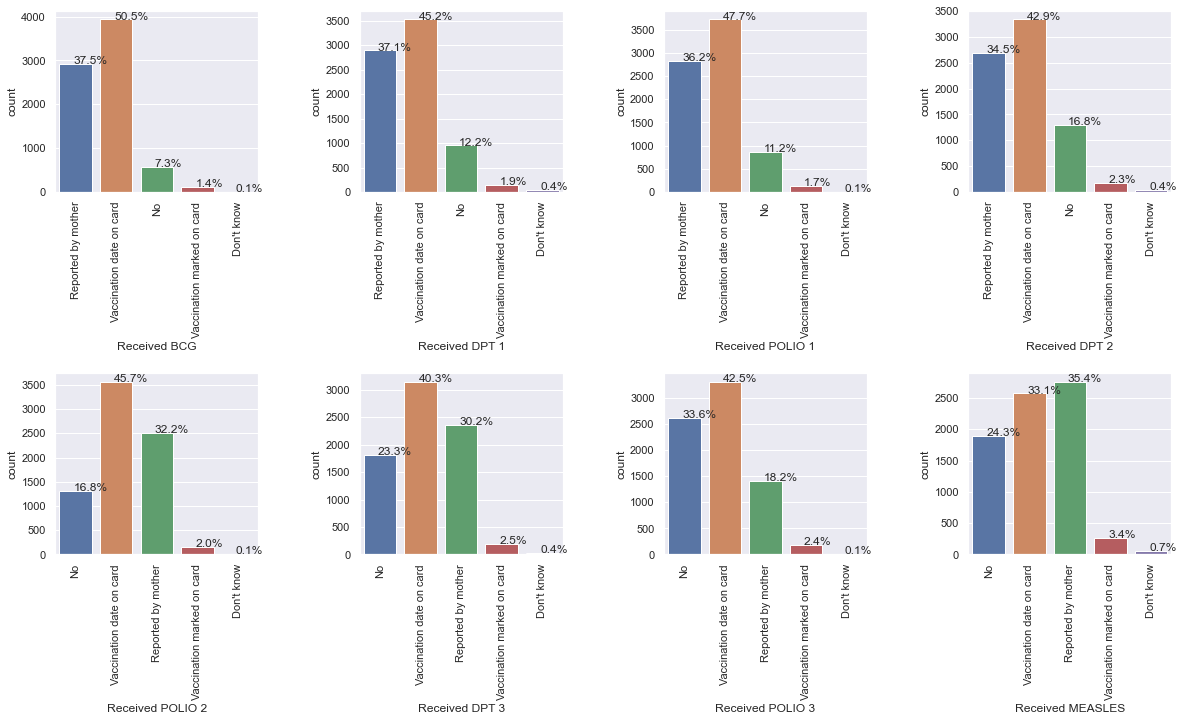

In [16]:
vaccine=["Received BCG","Received DPT 1","Received POLIO 1",
         "Received DPT 2","Received POLIO 2","Received DPT 3",
         "Received POLIO 3","Received MEASLES"]
fig, ax = plt.subplots(2,4, figsize=(20,10))
for variable, subplot in zip(vaccine, ax.flatten()):
    a=sns.countplot(df[variable], ax=subplot)
    total = len(df[variable])
    for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        a.annotate(percentage, (x, y), size = 12)
    for label in subplot.get_xticklabels():
        fig.subplots_adjust(hspace=1)
        fig.subplots_adjust(wspace=.5)

        label.set_rotation(90)

# Diet Charts

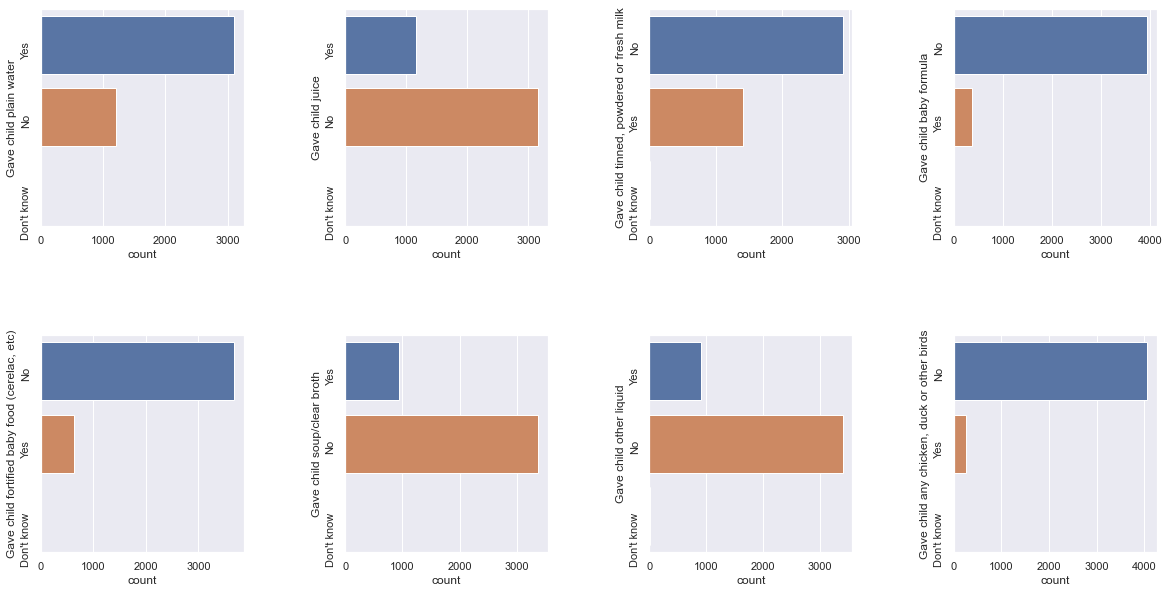

In [17]:
Diet_chart=["Gave child plain water","Gave child juice",
            "Gave child tinned, powdered or fresh milk",
             "Gave child baby formula","Gave child fortified baby food (cerelac, etc)",
            "Gave child soup/clear broth",
         "Gave child other liquid","Gave child any chicken, duck or other birds",
            "Gave child eggs"]
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(Diet_chart, ax.flatten()):
    sns.countplot(y=df[variable], ax=subplot)
    for label in subplot.get_yticklabels():
        fig.subplots_adjust(hspace=.5)
        fig.subplots_adjust(wspace=.5)

        label.set_rotation(90)

# Medical_Treatment

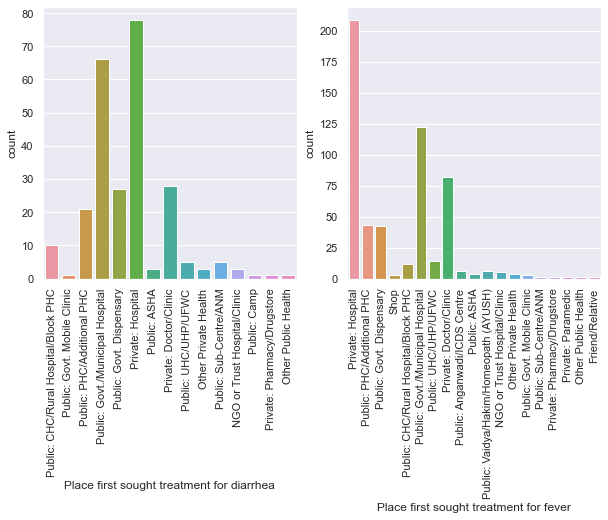

In [18]:
Medical_Treatment=["Place first sought treatment for diarrhea",
                  "Place first sought treatment for fever"]
fig, ax = plt.subplots(1,2, figsize=(10,5),)
for variable, subplot in zip(Medical_Treatment, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        fig.subplots_adjust(hspace=.5)
        label.set_rotation(90)

# Diarrhea

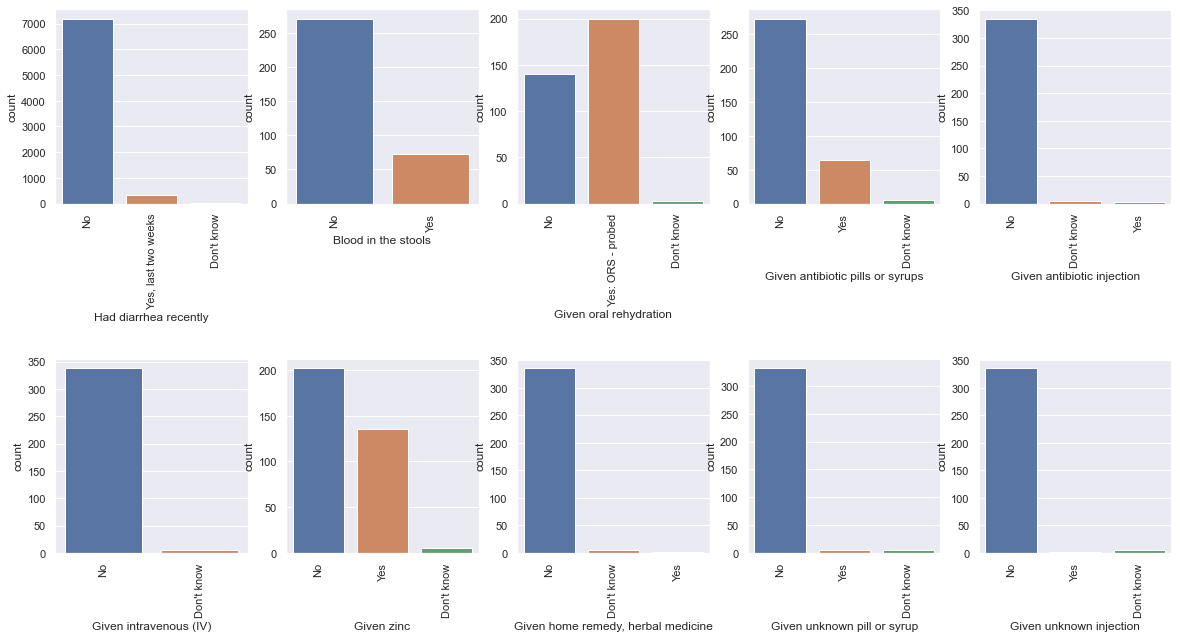

In [19]:
Diarrhea=["Had diarrhea recently","Blood in the stools",
                    "Given oral rehydration","Given antibiotic pills or syrups",
                    "Given antibiotic injection","Given intravenous (IV)",
                   "Given zinc","Given home remedy, herbal medicine",
                    "Given unknown pill or syrup",
                    "Given unknown injection"]
fig, ax = plt.subplots(2,5, figsize=(20,10),)
for variable, subplot in zip(Diarrhea, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        fig.subplots_adjust(hspace=.8)
        label.set_rotation(90)

# Fever

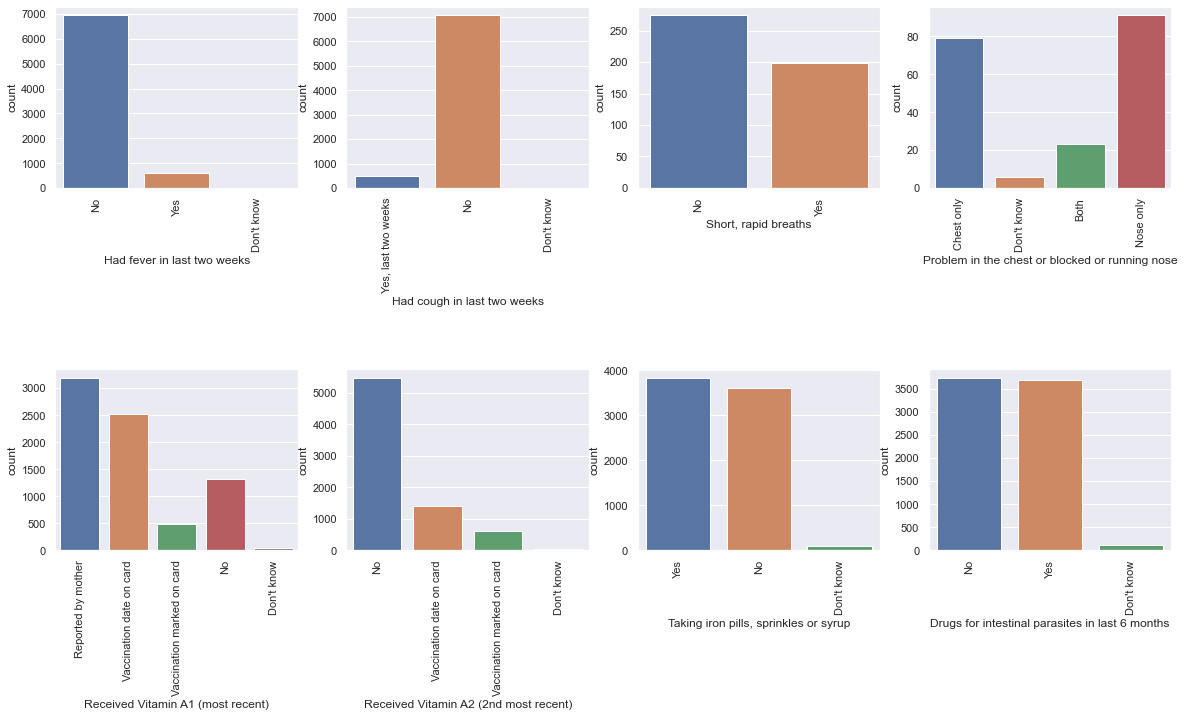

In [20]:
Fever=["Had fever in last two weeks","Had cough in last two weeks","Short, rapid breaths",
                 "Problem in the chest or blocked or running nose",
                   "Received Vitamin A1 (most recent)",
                   "Received Vitamin A2 (2nd most recent)",
                 "Taking iron pills, sprinkles or syrup",
                "Drugs for intestinal parasites in last 6 months"]
fig, ax = plt.subplots(2,4, figsize=(20,10),)
for variable, subplot in zip(Fever, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        fig.subplots_adjust(hspace=1)
        label.set_rotation(90)

## Bivariate Analysis

# Prevelance of Anemia by age

Text(0.5, 1.0, 'Anemia-SD')

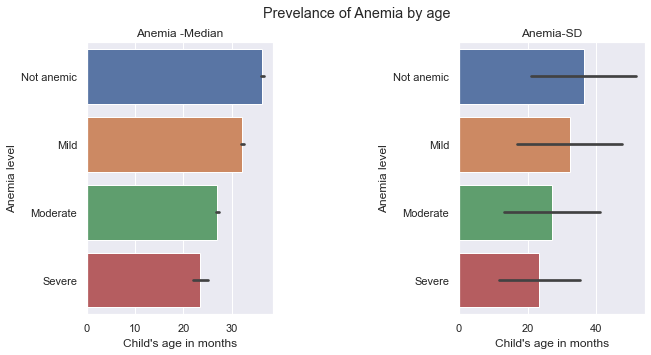

In [21]:
#Locating and removing outliers from Categorical variables
df.loc[(df["Anemia level"] == '9'),"Anemia level"]=''

fig, axes = plt.subplots(1,2, figsize=(10, 5))
fig.subplots_adjust(wspace=1)

fig.suptitle('Prevelance of Anemia by age')

#Median
sns.barplot(ax=axes[0],y=df["Anemia level"], x=df["Child's age in months"],ci=68)
axes[0].set_title("Anemia -Median")

# Standard Deviation
sns.barplot(ax=axes[1],y=df["Anemia level"], x=df["Child's age in months"],ci="sd")
axes[1].set_title("Anemia-SD")



# Prevelance of Diarrhea by age

Text(0.5, 1.0, 'Diarrhea-SD')

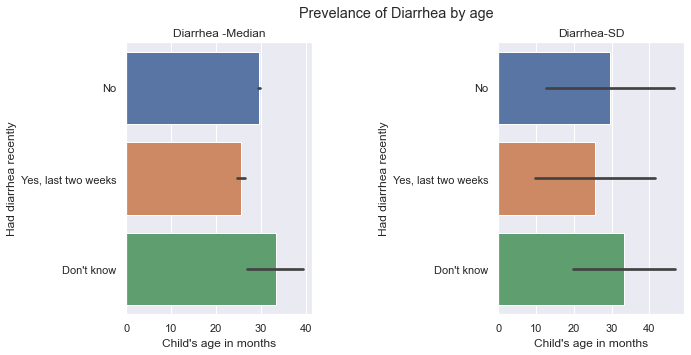

In [22]:
# Diarrhea
fig, axes = plt.subplots(1,2, figsize=(10, 5))
fig.subplots_adjust(wspace=1)

fig.suptitle('Prevelance of Diarrhea by age')

#Median
sns.barplot(ax=axes[0],y=df["Had diarrhea recently"], x=df["Child's age in months"],ci=68)
axes[0].set_title("Diarrhea -Median")

# Standard Deviation
sns.barplot(ax=axes[1],y=df["Had diarrhea recently"], x=df["Child's age in months"],ci="sd")
axes[1].set_title("Diarrhea-SD")



# Prevelance of Fever by age

Text(0.5, 1.0, 'Fever-SD')

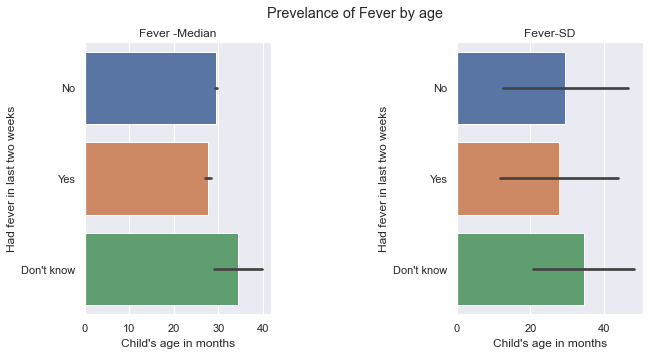

In [23]:
# Fever
fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.subplots_adjust(wspace=1)

fig.suptitle('Prevelance of Fever by age')

#Median
sns.barplot(ax=axes[0],y=df["Had fever in last two weeks"], x=df["Child's age in months"],ci=68)
axes[0].set_title("Fever -Median")

# Standard Deviation
sns.barplot(ax=axes[1],y=df["Had fever in last two weeks"], x=df["Child's age in months"],ci="sd")
axes[1].set_title("Fever-SD")


# Prevelance of Cough by age

Text(0.5, 1.0, 'Cough-SD')

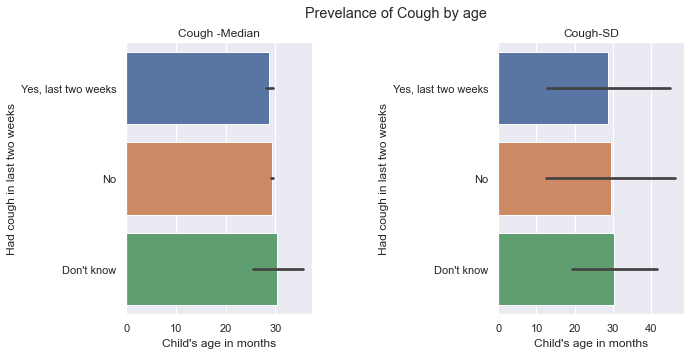

In [24]:
# Cough
fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.subplots_adjust(wspace=1)

fig.suptitle('Prevelance of Cough by age')

#Median
sns.barplot(ax=axes[0],y=df["Had cough in last two weeks"], x=df["Child's age in months"],ci=68)
axes[0].set_title("Cough -Median")

# Standard Deviation
sns.barplot(ax=axes[1],y=df["Had cough in last two weeks"], x=df["Child's age in months"],ci="sd")
axes[1].set_title("Cough-SD")


# Multivariate analysis

(array([ 982, 5864], dtype=int64),)


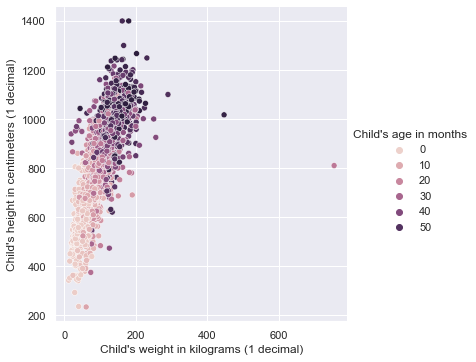

In [25]:

sns.relplot(data=df,
    x="Child's weight in kilograms (1 decimal)", y="Child's height in centimeters (1 decimal)", 
    hue="Child's age in months")

#Locating outlier whose weigh is greater than 40 kg
print(np.where(df["Child's weight in kilograms (1 decimal)"]>400))


Text(0.5, 1.0, 'Currently breastfeeding')

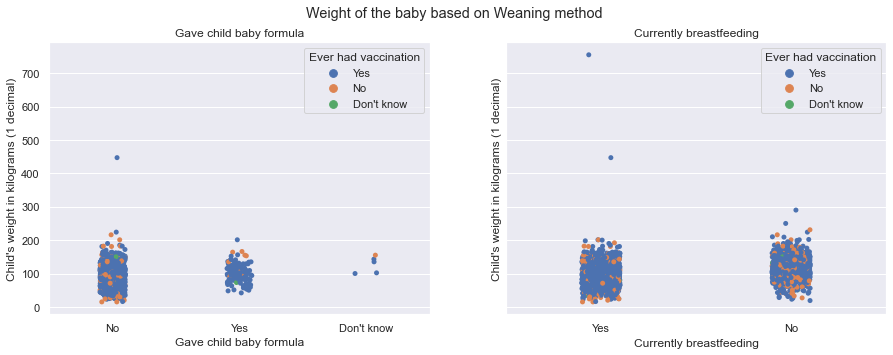

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Weight of the baby based on Weaning method')

# Formula
sns.stripplot(ax=axes[0], x="Gave child baby formula",  y="Child's weight in kilograms (1 decimal)",hue="Ever had vaccination",data=df)
axes[0].set_title("Gave child baby formula")

# Breastfeed
sns.stripplot(ax=axes[1], x="Currently breastfeeding",  y="Child's weight in kilograms (1 decimal)",hue="Ever had vaccination",data=df)
axes[1].set_title("Currently breastfeeding")



Text(0.5, 1.0, 'Currently breastfeeding')

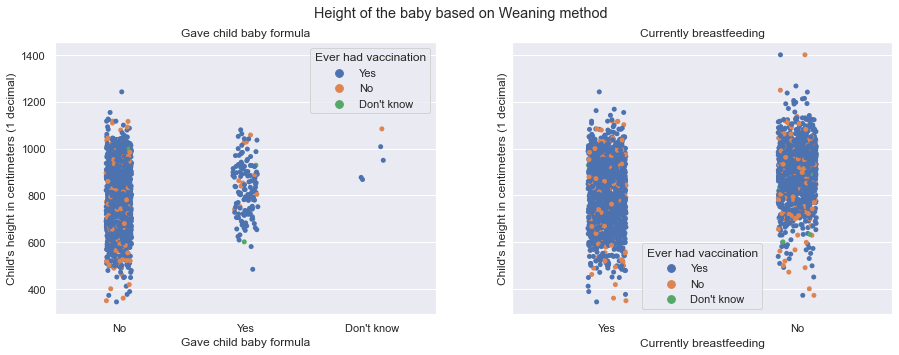

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Height of the baby based on Weaning method')

# Formula
sns.stripplot(ax=axes[0], x="Gave child baby formula",  y="Child's height in centimeters (1 decimal)",hue="Ever had vaccination",data=df)
axes[0].set_title("Gave child baby formula")

# Breastfeed
sns.stripplot(ax=axes[1], x="Currently breastfeeding",  y="Child's height in centimeters (1 decimal)",hue="Ever had vaccination",data=df)
axes[1].set_title("Currently breastfeeding")